In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Layer

from keras import backend as K
from keras.initializers import RandomUniform, Initializer, Constant
from keras.models import Sequential 
from keras.layers import Dense, Flatten
from keras.layers import Activation
from keras.optimizer_v2 import rmsprop
from keras.optimizer_v2 import adam

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

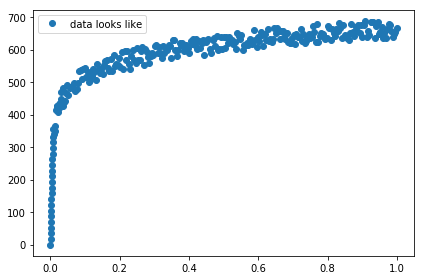

In [2]:
data = np.loadtxt("E:/nmtuan97/1_scripts/ml_learning/data_test.csv", delimiter=',')
X = data[:,:1]
y = data[:,1:2]

# noise = np.random.uniform(-25, 25, len(y)).reshape(len(y),1)
X = MinMaxScaler().fit_transform(X)
# y = y + noise

plt.plot(X, y, 'o', label='data looks like')
plt.legend()
plt.tight_layout()
plt.show()

In [32]:
# train model using svr method

r2_ = 0.98
r2_train_ = 0.0
r2_test_ = 0.0
max_ = 0
while r2_test_ < float(r2_):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25)
    
    svr_model = SVR(kernel = 'rbf', C=100000, gamma=200)
    svr_model.fit(X_train, y_train)
    
    y_train_predicted_svr_ = svr_model.predict(X_train)
    y_test_predicted_svr_ = svr_model.predict(X_test)
    
    rmse_train_ = np.sqrt(mean_squared_error(y_train, y_train_predicted_svr_))
    r2_train_ = r2_score(y_train, y_train_predicted_svr_)
    mae_train_ = mean_absolute_error(y_train, y_train_predicted_svr_)
    # Evaluating test dataset
    rmse_test_ = np.sqrt(mean_squared_error(y_test, y_test_predicted_svr_))
    r2_test_ = r2_score(y_test, y_test_predicted_svr_)
    mae_test_ = mean_absolute_error(y_test, y_test_predicted_svr_)
    
    if r2_test_ > max_:
        max_ = r2_test_
        print("R2 score of test is {}".format(max_))
        
print("-------------------------------------------")
print("RMSE of training is {}".format(rmse_train_))
print("R2 score of training  is {}".format(r2_train_))
print("MAE of training is {}".format(mae_train_))
print("RMSE of test is {}".format(rmse_test_))
print("R2 score of test is {}".format(max_))
print("MAE of test is {}".format(mae_test_))

c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


R2 score of test is 0.9694565823772466


c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


R2 score of test is 0.9831194655212913
-------------------------------------------
RMSE of training is 20.44388241699621
R2 score of training  is 0.9709149746180831
MAE of training is 15.049378244739447
RMSE of test is 21.068276778469002
R2 score of test is 0.9831194655212913
MAE of test is 17.352420905224108


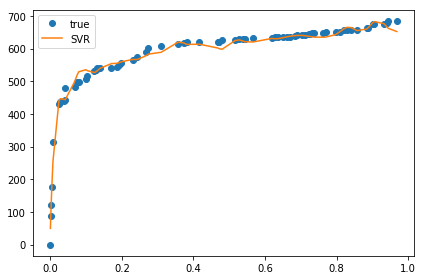

In [39]:
# svr_model_ = f"svr_model.pickle"
# print(f"Save model to file {svr_model_} ... ", end="")
# pickle.dump(svr_model, open(svr_model_, "wb"))
# print("OK")

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25)

X_test = np.sort(X_test, axis=0)

y_test = np.sort(y_test, axis=0)

y_pred_2 = svr_model.predict(X_test)

plt.plot(X_test, y_test, 'o', label='true')
plt.plot(X_test, y_pred_2, '-', label='SVR')
plt.legend()
plt.tight_layout()
plt.show()

In [30]:
# check underfitting (high bias) and overfitting (high variance)

gamma_ = np.arange(50, 1000, 10)
gamma_ = gamma_.flatten()
print(len(gamma_))

# TRAINING ERROR PER DEGREE
train_mae_errors = []
# TEST ERROR PER DEGREE
test_mae_errors = []

for g in gamma_:
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25)
    
    svr_model = SVR(kernel = 'rbf', C=100000, gamma=g)
    svr_model.fit(X_train, y_train)
    
    y_train_predicted_svr_ = svr_model.predict(X_train)
    y_test_predicted_svr_ = svr_model.predict(X_test)
    
    rmse_train_ = np.sqrt(mean_squared_error(y_train, y_train_predicted_svr_))
    r2_train_ = r2_score(y_train, y_train_predicted_svr_)
    mae_train_ = mean_absolute_error(y_train, y_train_predicted_svr_)
    # Evaluating test dataset
    rmse_test_ = np.sqrt(mean_squared_error(y_test, y_test_predicted_svr_))
    r2_test_ = r2_score(y_test, y_test_predicted_svr_)
    mae_test_ = mean_absolute_error(y_test, y_test_predicted_svr_)
    
    print("R2 score of train is {}".format(r2_train_))
    print("R2 score of test is {}".format(r2_test_))
        
    train_mae_errors.append(mae_train_)
    test_mae_errors.append(mae_test_)

95
R2 score of train is 0.9603526400447866
R2 score of test is 0.940134066714462
R2 score of train is 0.9574685215551095
R2 score of test is 0.9600635956236596


c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


R2 score of train is 0.9612492533752659
R2 score of test is 0.9469760031764012
R2 score of train is 0.9592548250312963
R2 score of test is 0.9618519041220892


c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


R2 score of train is 0.9558693535191986
R2 score of test is 0.947702662940396
R2 score of train is 0.970496245073747
R2 score of test is 0.9506464406204772


c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


R2 score of train is 0.9694924166582829
R2 score of test is 0.9706256236873761


c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


R2 score of train is 0.9735958300967288
R2 score of test is 0.9540898998462374


c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


R2 score of train is 0.975249877251159
R2 score of test is 0.9653680856706187
R2 score of train is 0.97333080334011

c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)



R2 score of test is 0.9718050781711526
R2 score of train is 0.9803288349849665
R2 score of test is 0.9455555725678102


c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


R2 score of train is 0.9765398711564823
R2 score of test is 0.967319859103379
R2 score of train is 0.9780751598140491
R2 score of test is 0.953794406173998


c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


R2 score of train is 0.9764820323045303
R2 score of test is 0.9763627985904278
R2 score of train is 0.9726719713202471
R2 score of test is 0.9784595292365728


c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


R2 score of train is 0.9794676165057001
R2 score of test is 0.9699045991419503


c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


R2 score of train is 0.9814459436831264
R2 score of test is 0.9639999979748634


c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


R2 score of train is 0.9813712703055975
R2 score of test is 0.9387012574667736


c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


R2 score of train is 0.9776387575662687
R2 score of test is 0.9740560451785926


c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


R2 score of train is 0.9806137044874482
R2 score of test is 0.9703663798575968


c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


R2 score of train is 0.9806390545267836
R2 score of test is 0.9710883020429316


c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


R2 score of train is 0.9805299434578563
R2 score of test is 0.9673413732923625
R2 score of train is 0.9790287043822063

c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)



R2 score of test is 0.9736525127301143
R2 score of train is 0.9809583086892264
R2 score of test is 0.9744467123737561


c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


R2 score of train is 0.9823589547867313
R2 score of test is 0.9636438202107844


c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


R2 score of train is 0.9814268141129155
R2 score of test is 0.9686283982331337


c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


R2 score of train is 0.9782840367545
R2 score of test is 0.97956839611634


c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


R2 score of train is 0.9791251397086832
R2 score of test is 0.9820212616072557


c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


R2 score of train is 0.9832068584086764
R2 score of test is 0.9710908291435584


c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


R2 score of train is 0.9837132576255362
R2 score of test is 0.9688530118817256


c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


R2 score of train is 0.9819420992186558
R2 score of test is 0.9746520406292036


c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


R2 score of train is 0.9859646718793832
R2 score of test is 0.9428625726560449


c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


R2 score of train is 0.9850465802212952
R2 score of test is 0.9678202789489116


c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


R2 score of train is 0.9846323503642469
R2 score of test is 0.9653152069630413


c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


R2 score of train is 0.9810459475575383
R2 score of test is 0.9369906277742996


c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


R2 score of train is 0.983270861197651
R2 score of test is 0.9751478111066468


c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


R2 score of train is 0.9806199365884042
R2 score of test is 0.9828116587813904


c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


R2 score of train is 0.9828021515210213
R2 score of test is 0.9773854592002916


c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


R2 score of train is 0.9812723215916498
R2 score of test is 0.9782411789739551


c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


R2 score of train is 0.9842290879964583
R2 score of test is 0.9580730610275309


c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


R2 score of train is 0.9842186361553418
R2 score of test is 0.9726471932281591


c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


R2 score of train is 0.9857864074629218
R2 score of test is 0.9511232188111771


c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


R2 score of train is 0.9854222527293308
R2 score of test is 0.9619756035775507


c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


R2 score of train is 0.9854929043506777
R2 score of test is 0.9634574471718454


c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


R2 score of train is 0.9856293744811089
R2 score of test is 0.9658512574843366


c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


R2 score of train is 0.9860446401111367
R2 score of test is 0.9691900361737118


c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


R2 score of train is 0.9856870804113597
R2 score of test is 0.9663701312403286


c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


R2 score of train is 0.9816713475018624
R2 score of test is 0.9760965225502051


c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


R2 score of train is 0.9782420824022157
R2 score of test is 0.9873835855594237


c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


R2 score of train is 0.9818003239007462
R2 score of test is 0.9790217016829138


c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


R2 score of train is 0.9822955298564149
R2 score of test is 0.975840916310807


c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


R2 score of train is 0.9852124694473149
R2 score of test is 0.9713535163529948


c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


R2 score of train is 0.9851633971855034
R2 score of test is 0.9665234040753865


c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


R2 score of train is 0.986007834563343
R2 score of test is 0.9578169265382493


c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


R2 score of train is 0.9841114391563794
R2 score of test is 0.972590146074096


c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


R2 score of train is 0.9852344555264564
R2 score of test is 0.9714803366821515


c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


R2 score of train is 0.9810266274450815
R2 score of test is 0.981148720879791


c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


R2 score of train is 0.986152647985822
R2 score of test is 0.9649885703387282


c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


R2 score of train is 0.9833163432249815
R2 score of test is 0.9781165309461318


c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


R2 score of train is 0.9840861306972916
R2 score of test is 0.9784014168187772


c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


R2 score of train is 0.9874152329046794
R2 score of test is 0.9562239235045017


c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


R2 score of train is 0.9859411948424323
R2 score of test is 0.9664811136888722


c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


R2 score of train is 0.9881647016083557
R2 score of test is 0.9430519834132056


c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


R2 score of train is 0.9815329849733392
R2 score of test is 0.9796249178776202


c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


R2 score of train is 0.9868891532885692
R2 score of test is 0.9531910824344934


c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


R2 score of train is 0.9864313476850313
R2 score of test is 0.9718355569166351


c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


R2 score of train is 0.9841184504309515
R2 score of test is 0.9773290322611043


c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


R2 score of train is 0.9851305524920005
R2 score of test is 0.9748496220352719


c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


R2 score of train is 0.9875377386680543
R2 score of test is 0.9644517298694637


c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


R2 score of train is 0.9856614842816612
R2 score of test is 0.9685912721935257


c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


R2 score of train is 0.9845822428280885
R2 score of test is 0.9774581453301068


c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


R2 score of train is 0.9863814860989629
R2 score of test is 0.9620466459705055


c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


R2 score of train is 0.9870313213409608
R2 score of test is 0.9581031946418326


c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


R2 score of train is 0.9842175257039737
R2 score of test is 0.9813763357548966


c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


R2 score of train is 0.985326498807386
R2 score of test is 0.9676861307057498


c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


R2 score of train is 0.9871937387302048
R2 score of test is 0.9658761341289065


c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


R2 score of train is 0.986231412512032
R2 score of test is 0.9545999884315117


c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


R2 score of train is 0.9860416736663493
R2 score of test is 0.9690093952472967


c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


R2 score of train is 0.9815465444530289
R2 score of test is 0.9785905354131709


c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


R2 score of train is 0.984276910453285
R2 score of test is 0.9784842768021678


c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


R2 score of train is 0.9842570239980368
R2 score of test is 0.9803068081055117


c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


R2 score of train is 0.9867462936520615
R2 score of test is 0.9495902397132572


c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


R2 score of train is 0.9866532263393903
R2 score of test is 0.9298126335098806


c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


R2 score of train is 0.986739948205908
R2 score of test is 0.9658730653224089


c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


R2 score of train is 0.9890143962831599
R2 score of test is 0.8770857164303164


c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


R2 score of train is 0.9849477395798063
R2 score of test is 0.9734500807173252


c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


R2 score of train is 0.9877432478155193
R2 score of test is 0.9549268441995271


c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


R2 score of train is 0.9856165022016338
R2 score of test is 0.9745542271565405


c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


R2 score of train is 0.985607711046533
R2 score of test is 0.9689293581060316


c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


R2 score of train is 0.9883520197702622
R2 score of test is 0.9283680458919801


c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


R2 score of train is 0.9823378535570669
R2 score of test is 0.9840415747403886


c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


R2 score of train is 0.9870196214094921
R2 score of test is 0.9588307038239656


c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


R2 score of train is 0.9865445626442754
R2 score of test is 0.9653454673518661


c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


R2 score of train is 0.9852435925029299
R2 score of test is 0.9694192287047505


c:\Python36\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


R2 score of train is 0.9878422786660667
R2 score of test is 0.9549427750328826


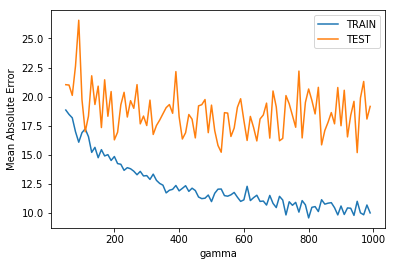

In [31]:
plt.plot(gamma_, train_mae_errors,label='TRAIN')
plt.plot(gamma_, test_mae_errors,label='TEST')
plt.xlabel("gamma")
plt.ylabel("Mean Absolute Error")
plt.legend()
plt.show()